In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

In [48]:
bit_senti = pd.read_csv(r"C:\Users\Lenovo\OneDrive\빅데이터분석&활용팀플\csv outputs\bit_senti2(onlyDate).csv", index_col =0)
bit_senti.head()

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,date,user_name,user_description,user_followers,user_friends,user_favourites,text,hashtags,is_retweet,cleaned_tweets,subjectivity,polarity,sentiment,only_date
1734667,2021-11-12 20:27:16,JomCRYPTO,Developer,5.0,41,394,@WatcherGuru #Btc\n#ETH \n#LTC \n#COSMOS \n#St...,"['Btc', 'ETH', 'LTC', 'COSMOS', 'Stellar', 'Do...",False,Dogs,0.000000,0.000000,neutral,2021-11-12
1734668,2021-11-12 20:27:15,Ali,NaN,80.0,217,191,@TheBitcoinConf @priceoftomorrow @addyinvest @...,"['shib', 'shiba', 'shiba_army', 'shibaw', 'shi...",False,Calm We go moon soon The new Shiba It x Unveil...,0.602273,0.218182,positive,2021-11-12
1734669,2021-11-12 20:27:08,Muhammed,NaN,34.0,81,3695,@Heatherfernsby #pitbulltoken will be the doge...,"['pitbulltoken', 'pitbull', 'PitbullToken100x'...",False,dogecoin future huge investor base,0.675000,-0.133333,negative,2021-11-12
1734670,2021-11-12 20:27:08,Francesco Santoro $VET,"Investitore #BNB , #CRO e #VET appassionato d...",76.0,354,1011,I am changing the way I invest. In the wallet ...,"['VET', 'btc', 'BNB']",False,I changing way I invest In wallet The rest fun...,0.000000,0.000000,neutral,2021-11-12
1734671,2021-11-12 20:27:05,GROND,Investor / Misantrophe / Fudie\n\nPyramid sche...,17.0,41,594,@LucaLand97 It is absolutely unbelievable. And...,['BTC'],False,It absolutely unbelievable And price hardly re...,0.770833,-0.270833,negative,2021-11-12


In [76]:
#csv 날짜 기준으로 정렬 
bit_senti = bit_senti.sort_values(by='only_date', ascending=True)
# print(list(bit_senti.only_date.unique()))
bit_senti

,date,user_name,user_description,user_followers,user_friends,user_favourites,text,hashtags,is_retweet,cleaned_tweets,subjectivity,polarity,sentiment,only_date
16288,2021-02-05 16:35:15,Binance Coin Tracker,Your buddy to find the best trade opportunitie...,204.0,72,1,🤩$AST 🤩Buy Signal\n▶Pair: AST/BTC \n🚦Signal: P...,"['btc', 'bitcoin']",False,AST Buy Signal Pair AST BTC Signal Price Cross...,0.0,0.0,neutral,2021-02-05
16862,2021-02-05 11:00:24,Iconic Funds,Professional Crypto Asset Management\nhttps://...,16813.0,818,1201,4⃣ 🎙️ Bloomberg LP #CryptoOutlook 2021 with @...,"['CryptoOutlook', 'cryptocurrency', 'bitcoin',...",False,Bloomberg LP,0.0,0.0,neutral,2021-02-05
16873,2021-02-05 10:54:52,Lion Period with MR.Emre,A Lion Story (Private group closed)\n#CryptoMo...,69.0,52,191,$PERL 0.06.\nI have insisted that since 0.02 i...,"['bitcoin', 'btc']",False,PERL I insisted since It increased month,0.0,0.0,neutral,2021-02-05
16234,2021-02-05 17:03:14,Tracey Bissett,| Money Coach | Speaker | Podcast Host | Award...,1162.0,2534,8718,Determining whether buying a security qualifie...,"['investing', 'speculation']",False,Determining whether buying security qualifies ...,0.0,0.0,neutral,2021-02-05
16879,2021-02-05 10:52:04,Iconic Holding,Professional Crypto Asset Ventures \nhttps://t...,301.0,1075,361,📖 Weekend Read 📖\n\nKeen to learn about #cryp...,['crypto'],False,Weekend Read Keen learn asset Check reading li...,0.0,0.0,neutral,2021-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680616,['btc'],Pin bb : 26ea62f8 . Line : baliratih_bali,4.0,21.0,False,2021-07-26 11:48:46,Twitter Web App,False,NaN,Twitter Web App,0.0,0.0,neutral,['btc']
120320,"['cryptocurrency', 'BSC', 'Bitcoin', 'Ethereum...",*Muhammad Yasir* hello stalker nice to tweet ...,280.0,499.0,False,2021-06-23 14:51:12,Twitter for Android,False,NaN,Twitter Android,0.0,0.0,neutral,['cryptocu
1693878,"['cryptotrading', 'tradingbots', 'altcoins', '...",💰 based on the latest AI innovations,5.0,0.0,False,2021-11-12 13:58:51,Twitter for iPhone,False,NaN,Twitter iPhone,0.0,0.0,neutral,['cryptotr
1377065,"['cryptotrading', 'crypto', 'tradingbots', 'bi...",💰 based on the latest AI innovations,4.0,0.0,False,2021-10-21 18:12:08,Twitter for iPhone,False,NaN,Twitter iPhone,0.0,0.0,neutral,['cryptotr


## 찾고자 하는 날짜 범위에 해당하는 인덱스 번호(시작-끝) 찾기

In [75]:
# 비트코인 최고점 날짜 = 2021.04.14   -> 4.07~4.12 살펴보기
# 비트코인 최저점 날짜 = 2021.07.19   -> 7.05~7.17 살펴보기


#최고점 기준 일주일 전 날짜의 인덱스 범위 찾기
aa = bit_senti[bit_senti['only_date']=='2021-04-07'].index
aa.sort_values()
print(bit_senti.only_date[49492])
bb = bit_senti[bit_senti['only_date']=='2021-04-12'].index
bb.sort_values()
print(bit_senti.only_date[38416])


#최저점 기준 일주일 전 날짜의 인덱스 범위 찾기
cc = bit_senti[bit_senti['only_date']=='2021-07-05'].index
cc.sort_values()
print(bit_senti.only_date[237472])
dd = bit_senti[bit_senti['only_date']=='2021-07-17'].index
dd.sort_values()
print(bit_senti.only_date[338136])

2021-04-07
2021-04-12
2021-07-05
2021-07-17


## 고점과 저점을 달성하기 전 일주일간의 워드클라우드 살펴보기

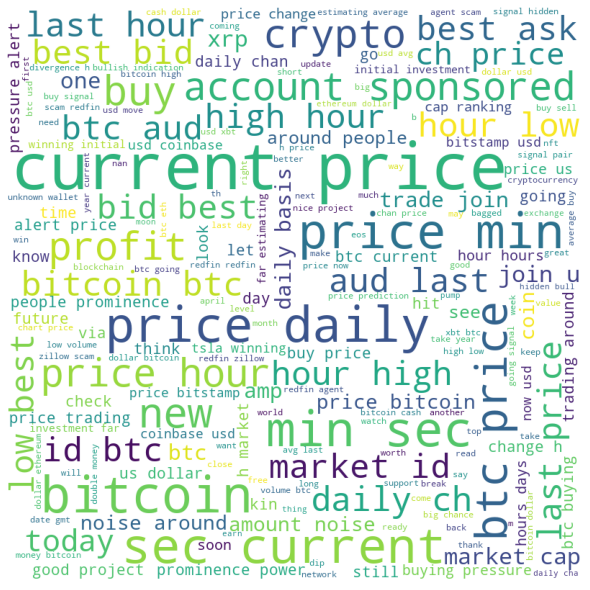

In [72]:
#1 최고점 날짜 기준 7일 전 트윗 
comment_words = ''
stopwords = set(STOPWORDS)

for val in bit_senti['cleaned_tweets'][38416:49492]:
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wc = WordCloud(width = 800, height = 800, max_words=1000,background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)

 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

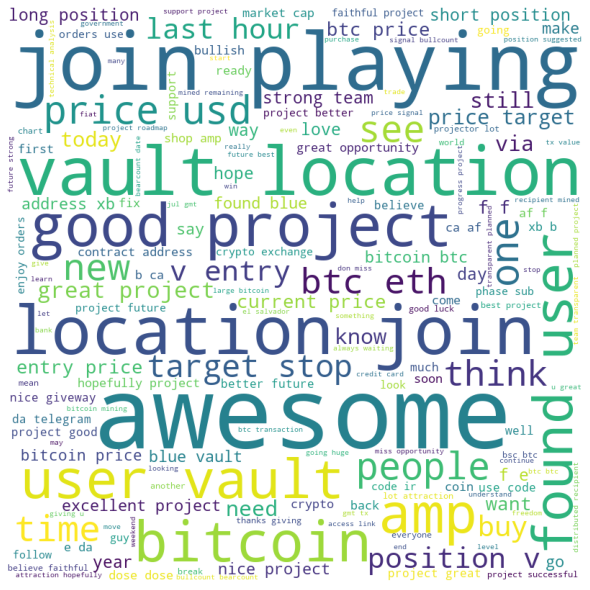

In [73]:
#2 최저점 날짜 기준 7일 전 트윗 
comment_words = ''
stopwords = set(STOPWORDS)

for val in bit_senti['cleaned_tweets'][237472:338136]:
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wc = WordCloud(width = 800, height = 800, max_words=1000,background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)

 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()